In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func



In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



C:\Users\kamac\AppData\Local\Temp\ipykernel_14020\4252262243.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
from sqlalchemy import inspect


In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the most recent date in the data set.
latest_dt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("The most recent date is: ", latest_dt)

The most recent date is:  ('2017-08-23',)


In [14]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago)

Date one year ago is:  2016-08-23


In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores

m_prcp = session.query(Measurement.date , Measurement.prcp ).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
m_prcp


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [23]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
df = pd.DataFrame(m_prcp, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.head()



,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


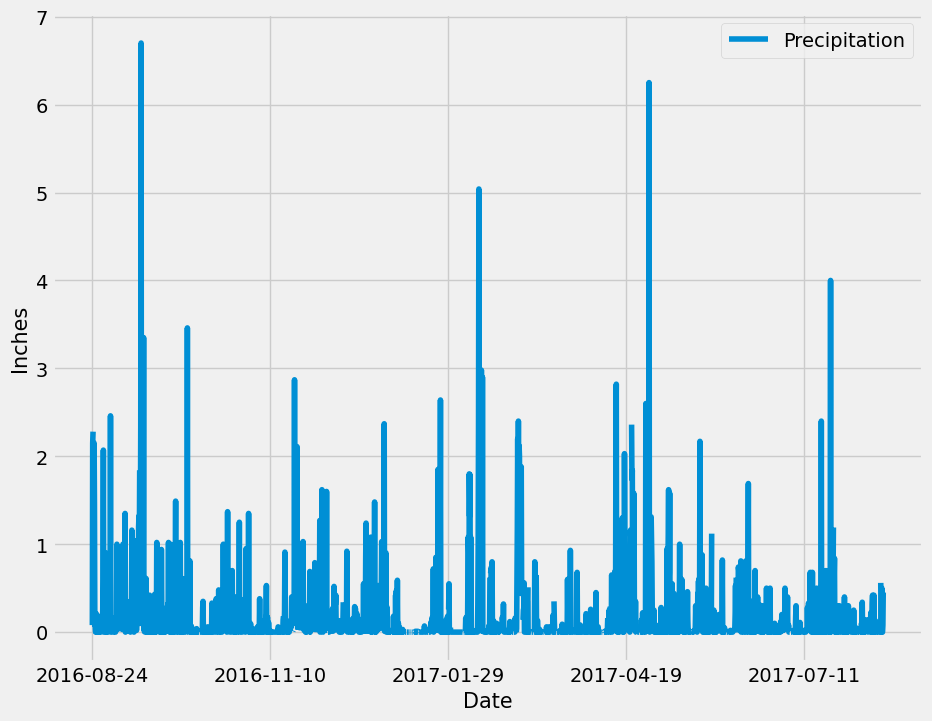

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,8))
plt.ylabel("Inches", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.savefig('fig1.png')

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(Station.station)).all()

[(9,)]

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
result



[(54.0, 85.0, 71.66378066378067)]

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
      filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()

year_temp

[(59.0,),
 (59.0,),
 (59.0,),
 (60.0,),
 (60.0,),
 (61.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (64.0,),
 (64.0,),
 (64.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (71.0,),


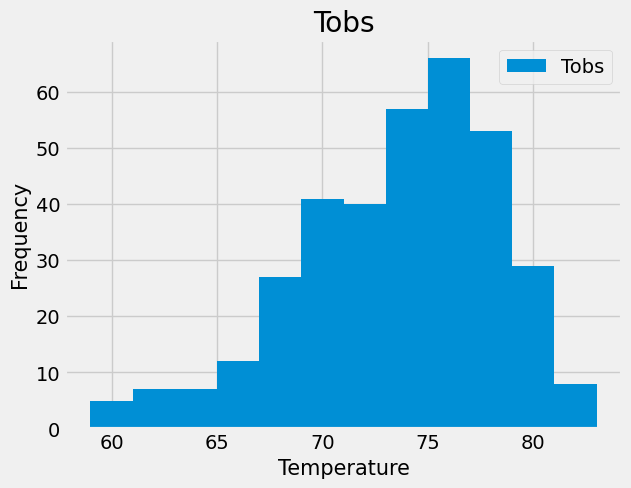

<Figure size 640x480 with 0 Axes>

In [50]:
df1 = pd.DataFrame(year_temp, columns=['Tobs'])
df1.hist(bins = 12)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Temperature", fontsize = 15)
labels = ["Tobs"]
plt.legend(labels)
plt.show()
plt.savefig('fig2.png')

# Close Session

In [47]:
# Close Session
session.close()